<Axes: xlabel='Temperature', ylabel='Humidity'>

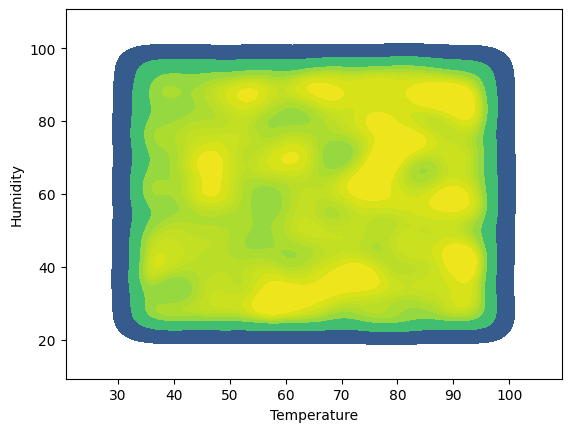

In [1]:
import polars as pl
import seaborn as sns

file_path = 'usa_rain_prediction_dataset_2024_2025.csv'
df = pl.read_csv(file_path)

sns.kdeplot(x='Temperature', y='Humidity', data=df, fill=True, cmap='viridis')


Text(0.5, 0.98, 'Boxplot of Temperature')

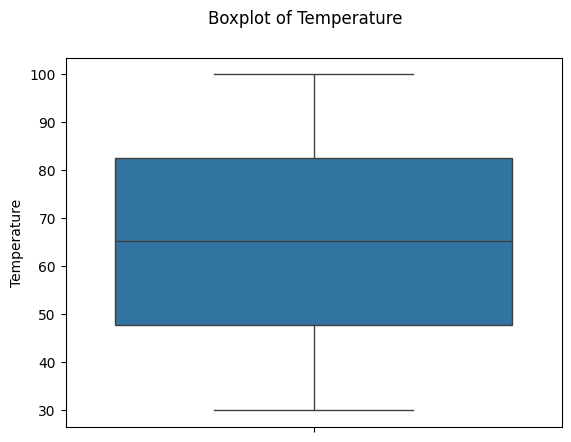

In [2]:
sns.boxplot(y='Temperature', data=df).figure.suptitle('Boxplot of Temperature')

In [9]:
print(df)

shape: (73_100, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Date      ┆ Location  ┆ Temperatu ┆ Humidity  ┆ … ┆ Precipita ┆ Cloud     ┆ Pressure  ┆ Rain     │
│ ---       ┆ ---       ┆ re        ┆ ---       ┆   ┆ tion      ┆ Cover     ┆ ---       ┆ Tomorrow │
│ str       ┆ str       ┆ ---       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ f64       ┆ ---      │
│           ┆           ┆ f64       ┆           ┆   ┆ f64       ┆ f64       ┆           ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2024-01-0 ┆ New York  ┆ 87.524795 ┆ 75.655455 ┆ … ┆ 0.0       ┆ 69.617966 ┆ 1026.0302 ┆ 0        │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆ 78        ┆          │
│ 2024-01-0 ┆ New York  ┆ 83.259325 ┆ 28.712617 ┆ … ┆ 0.526995  ┆ 41.606048 ┆ 995.96206 ┆ 0        │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆       

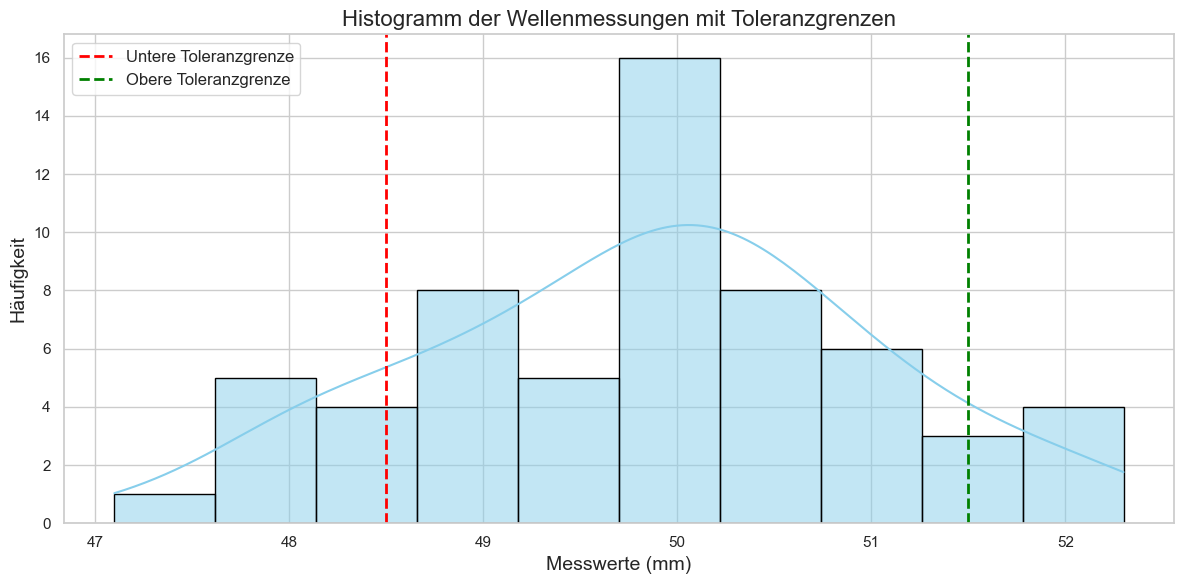

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw_data = """
51,3
51,9
49,8
49,6
49,1
50,0
48,9
51,5
52,0
49,1

48,7
50,2
51,0
48,0
48,8
48,1
49,4
48,3
49,8
51,4

49,9
50,5
48,4
49,8
52,3
49,9
50,2
50,8
50,8
51,0

49,0
49,7
50,7
49,1
49,7
50,1
50,1
50,3
50,4
50,2

49,4
47,1
49,4
52,0
48,6
51,1
47,7
49,4
48,2
47,9

48,1
50,0
50,2
50,4
50,0
50,5
49,0
50,5
50,6
51,1
"""

data = [float(x.replace(",", ".")) for x in re.findall(r"\d+,\d", raw_data)]
df = pd.DataFrame(data, columns=["Measurements"])
nominal = 50
tolerance = 1.5
lower_limit = nominal - tolerance
upper_limit = nominal + tolerance
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

hist_plot = sns.histplot(
    df["Measurements"], 
    bins=10, 
    kde=True,  
    color="skyblue", 
    edgecolor="black"
)
plt.axvline(lower_limit, color="red", linestyle="--", linewidth=2, label="Untere Toleranzgrenze")
plt.axvline(upper_limit, color="green", linestyle="--", linewidth=2, label="Obere Toleranzgrenze")
plt.title("Histogramm der Wellenmessungen mit Toleranzgrenzen", fontsize=16)
plt.xlabel("Messwerte (mm)", fontsize=14)
plt.ylabel("Häufigkeit", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()